In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm


In [2]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (5)\POP.csv")

In [3]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [4]:
df_copy = df.copy()

In [5]:
df_copy['date'] = pd.to_datetime(df.date)

In [6]:
df_copy.drop(columns = ['realtime_start', 'realtime_end'], inplace = True)

In [7]:
df_copy.set_index('date', inplace = True)

In [8]:
df_copy.asfreq(freq = 'M', method = 'ffill')

,value
date,
1952-01-31,156309.000
1952-02-29,156527.000
1952-03-31,156731.000
1952-04-30,156943.000
1952-05-31,157140.000
...,...
2019-07-31,329394.993
2019-08-31,329591.333
2019-09-30,329785.872


<AxesSubplot:xlabel='date'>

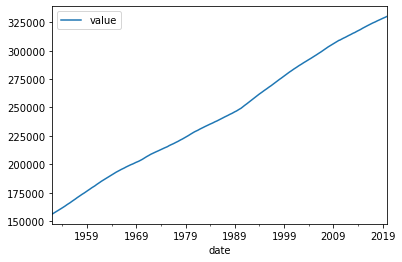

In [9]:
df_copy.plot()

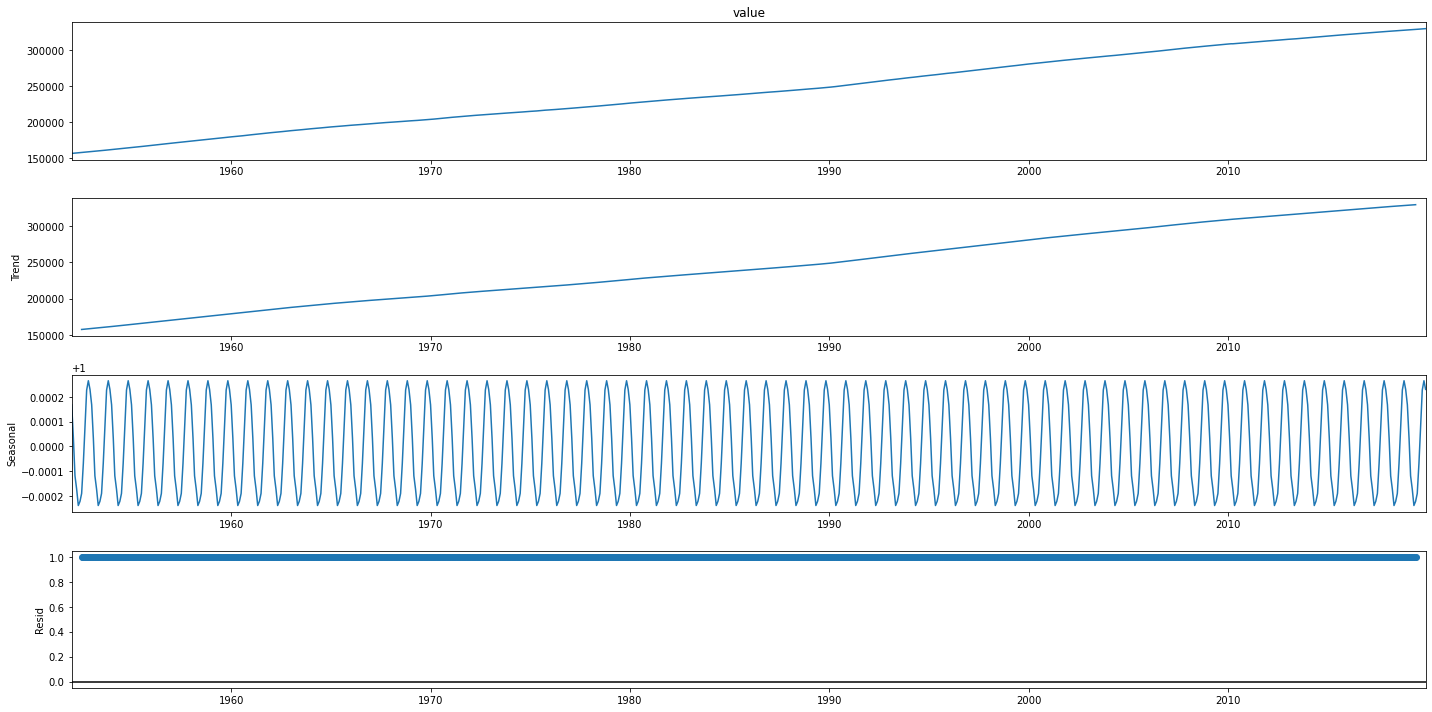

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

series = df_copy.value
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [11]:
from statsmodels.tsa.stattools import adfuller


In [12]:
adfuller(df_copy.value)

(-0.6653174110243981,
 0.8555297778919588,
 17,
 798,
 {'1%': -3.4385711275998583,
  '5%': -2.8651686574447375,
  '10%': -2.568702230639255},
 6593.486797606457)

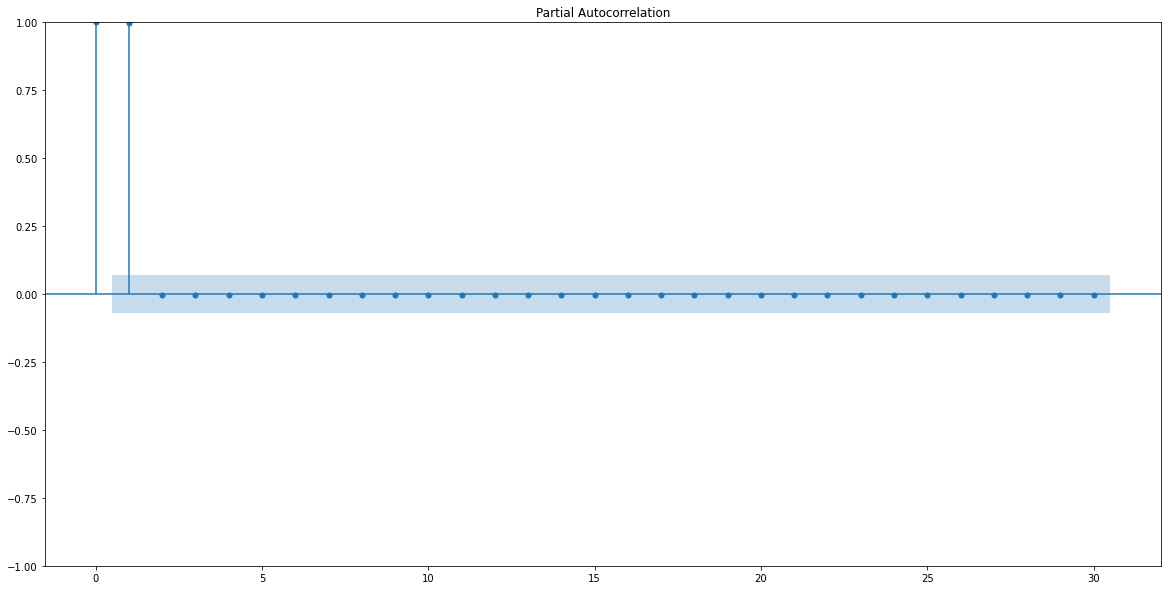

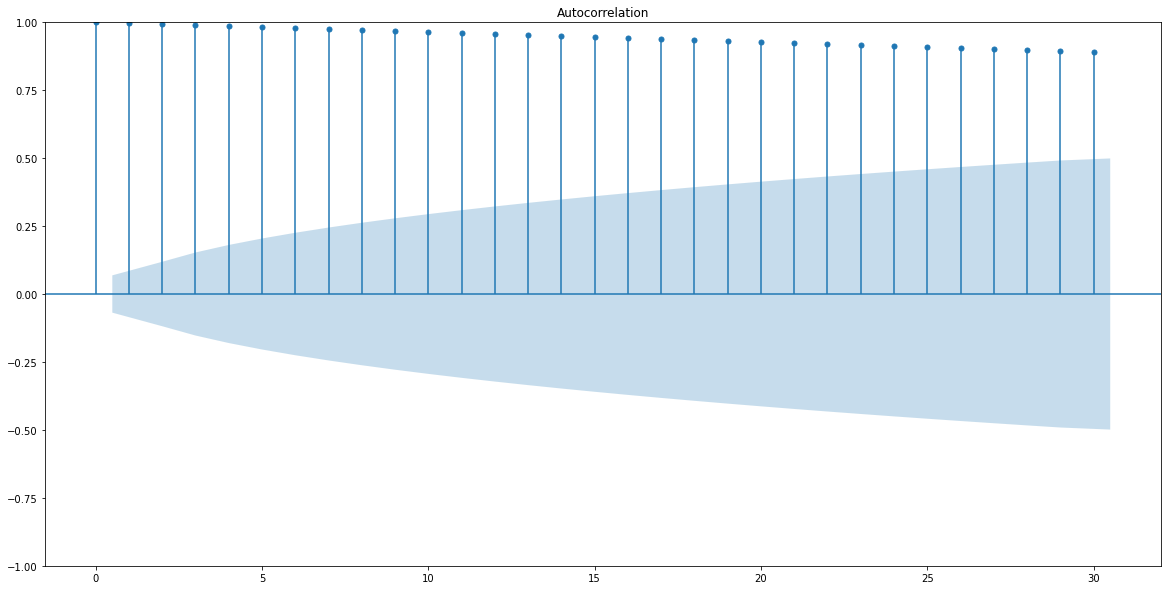

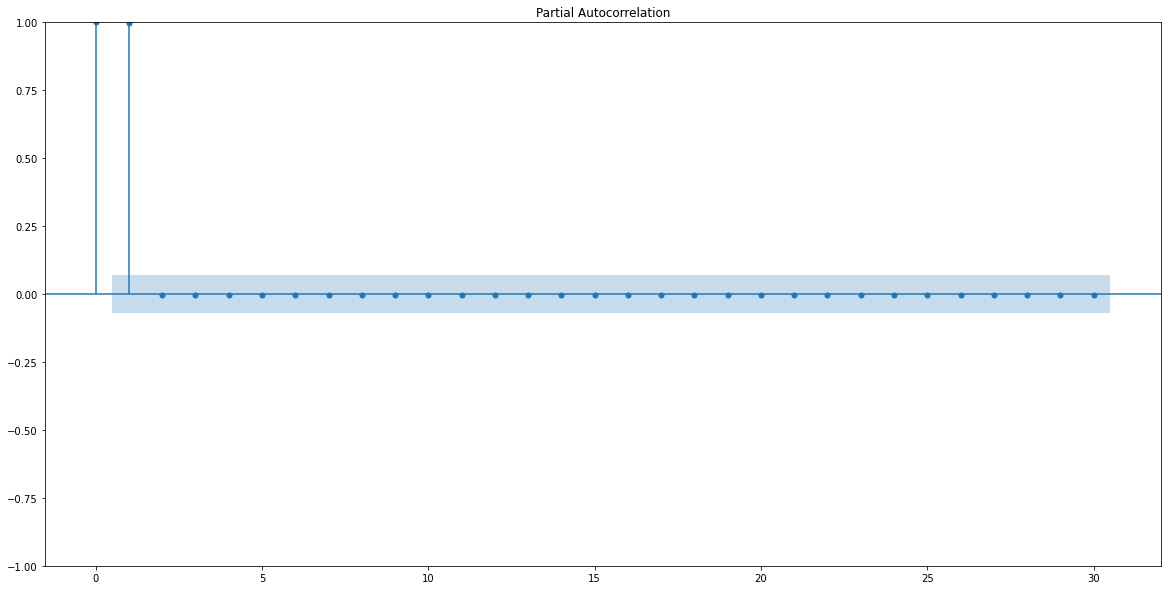

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_copy.value)
plot_pacf(df_copy.value)

In [14]:
df_copy['pc_change'] = df_copy.value.pct_change()


In [15]:
adfuller(sqrt_diff)

NameError: name 'sqrt_diff' is not defined

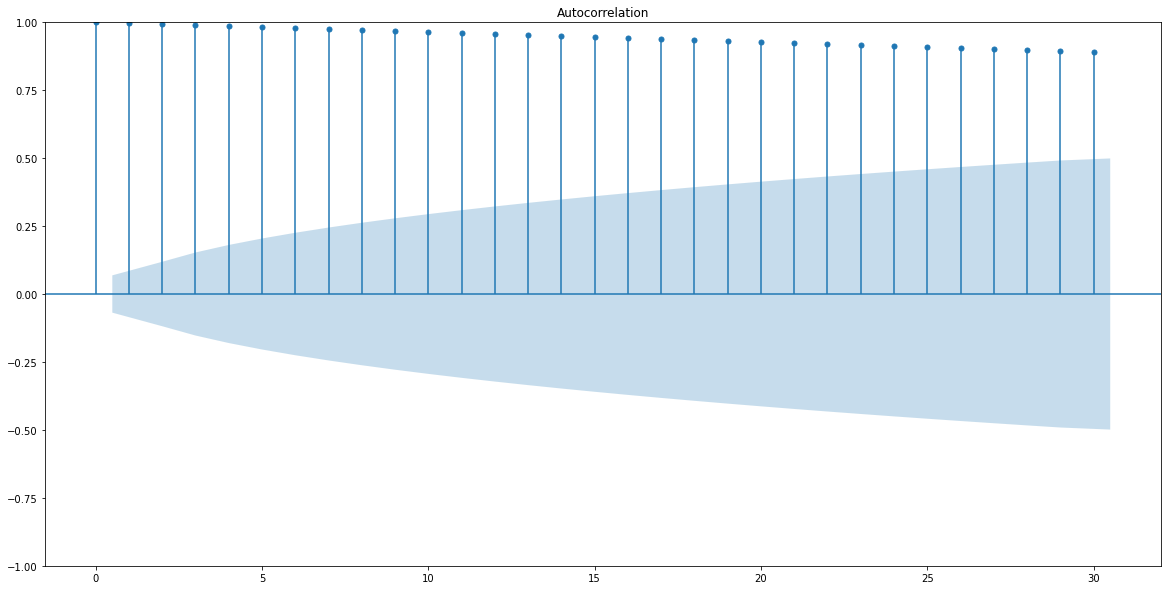

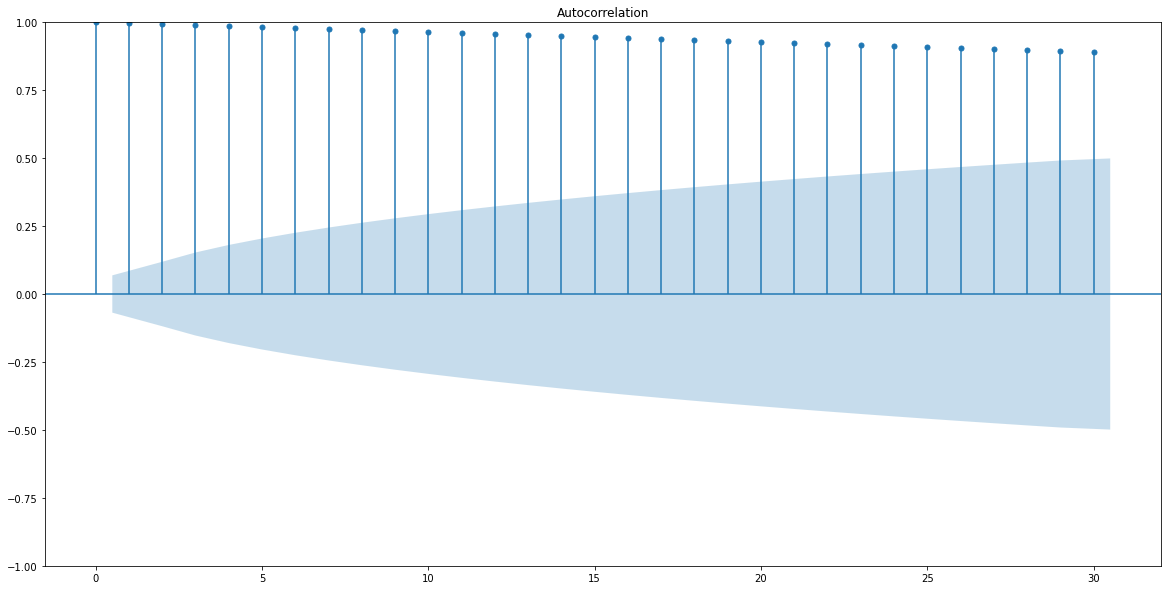

In [16]:
plot_acf(df_copy.value)

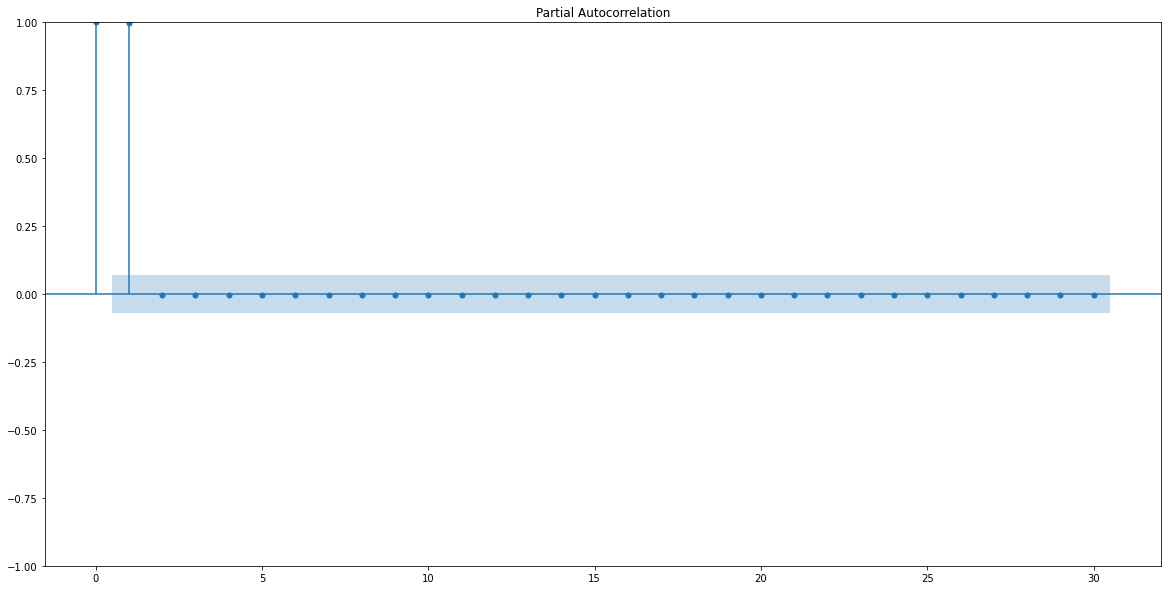

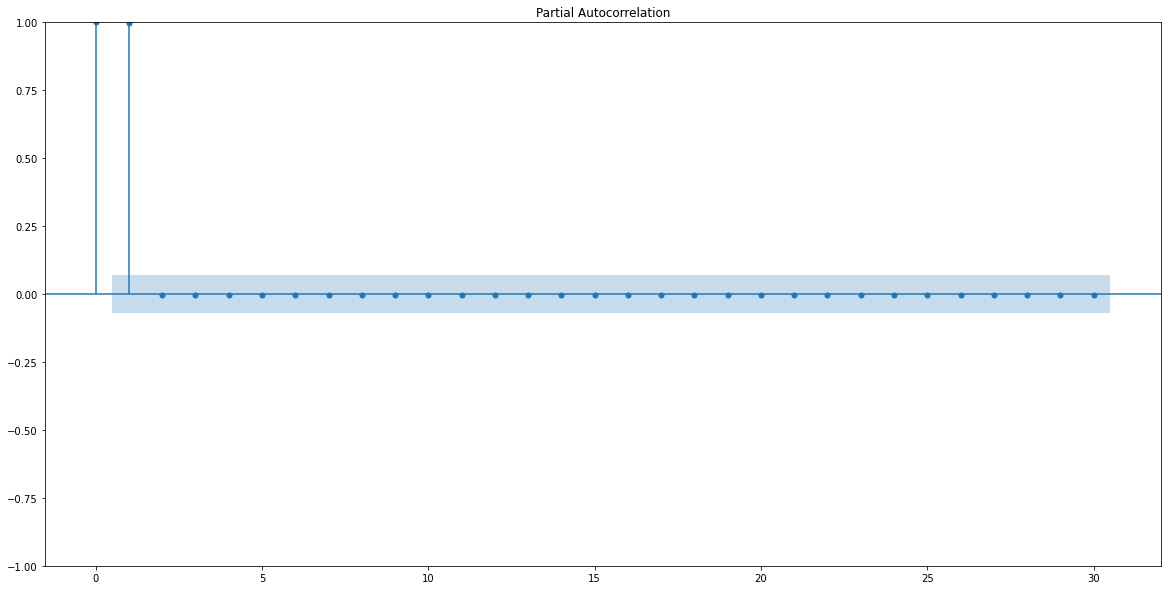

In [17]:
plot_pacf(df_copy.value)

In [18]:
sqrt_diff = np.sqrt(df_copy.value)

In [19]:
sqrt_diff = sqrt_diff.diff(1).dropna()

In [20]:
sqrt_diff = sqrt_diff.diff(12).dropna()

In [21]:
adfuller(sqrt_diff)

(-5.663649253396384,
 9.257154024260016e-07,
 14,
 788,
 {'1%': -3.4386757994332813,
  '5%': -2.865214793881868,
  '10%': -2.5687268080213355},
 -4254.513422207809)

<AxesSubplot:xlabel='date'>

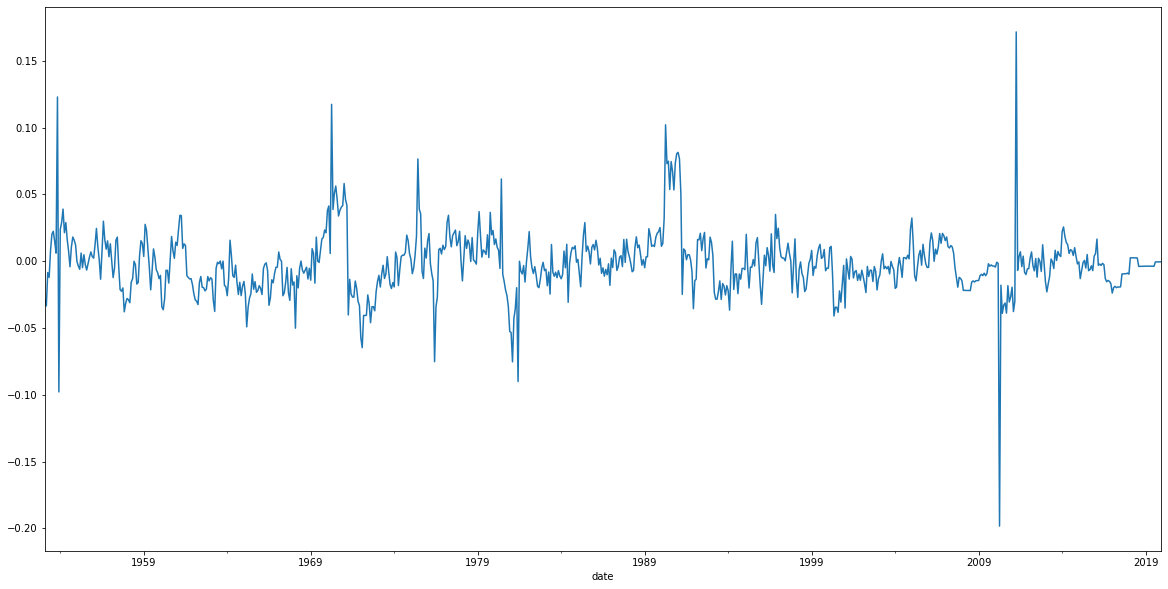

In [22]:
sqrt_diff.plot()

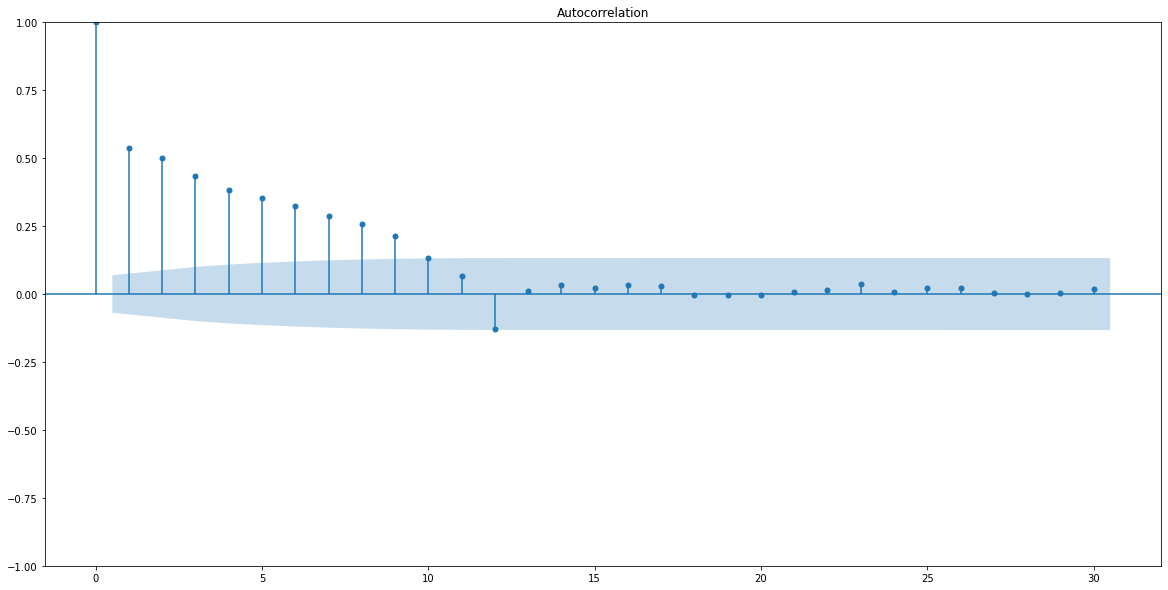

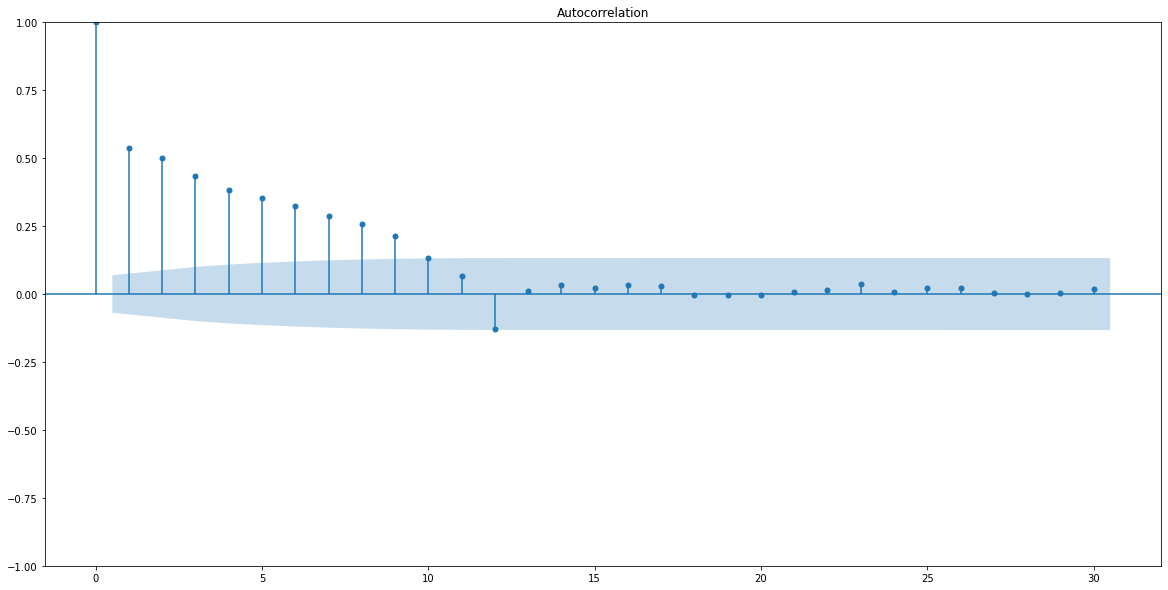

In [23]:
plot_acf(sqrt_diff)

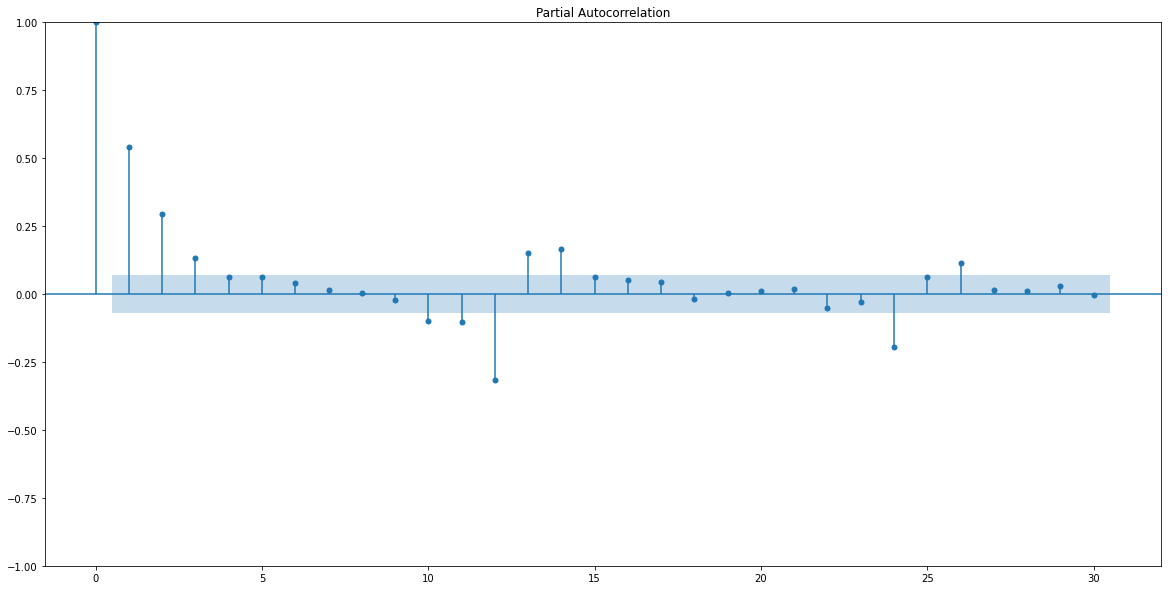

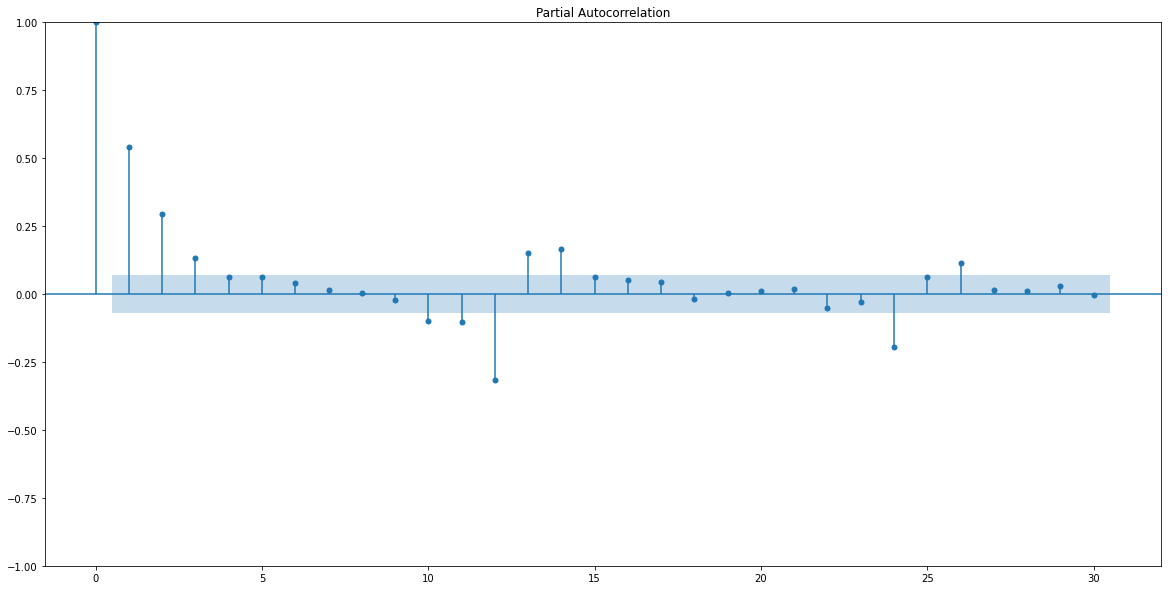

In [24]:
plot_pacf(sqrt_diff)

In [25]:
size = int(len(df_copy) * 0.8)
df_tr, df_test = df_copy[ : size], df_copy[size:]

In [26]:
import statsmodels.api as sm
from pmdarima import auto_arima

mod = auto_arima(df_copy.value, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=8.83 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=7610.697, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=6966.760, Time=2.28 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=7282.815, Time=3.55 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=7101.027, Time=0.60 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=6905.862, Time=10.07 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=31.38 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=8.80 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=7582.721, Time=6.82 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=6766.793, Time=13.15 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=6830.388, Time=3.11 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=42.97 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=13.23 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=6727.253, Time=16.58 sec
 ARIMA(3,1,0)(1,1,0)[24]             :

In [30]:
results  = mod.fit(df_tr.value)
print (results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  652
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 24)   Log Likelihood               -2569.705
Date:                             Mon, 05 Dec 2022   AIC                           5149.411
Time:                                     19:17:05   BIC                           5171.615
Sample:                                 01-01-1952   HQIC                          5158.037
                                      - 04-01-2006                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9720      0.009    104.055      0.000       0.954       0.990
ma.L1         -0.5665      

In [52]:
future_forecast = results.predict(n_periods = 12)

In [53]:
print(future_forecast)

2006-05-01    298503.620065
2006-06-01    298741.651423
2006-07-01    298988.637561
2006-08-01    299248.786389
2006-09-01    299511.692958
2006-10-01    299772.565317
2006-11-01    300014.249727
2006-12-01    300242.012347
2007-01-01    300459.756419
2007-02-01    300661.007176
2007-03-01    300857.541399
2007-04-01    301073.019088
Freq: MS, dtype: float64


In [54]:
df_test.head()

,value,pc_change
date,,
2006-05-01,298496.0,0.000721
2006-06-01,298739.0,0.000814
2006-07-01,298996.0,0.000860
2006-08-01,299263.0,0.000893
2006-09-01,299554.0,0.000972


In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  652
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 24)   Log Likelihood               -2569.705
Date:                             Mon, 05 Dec 2022   AIC                           5149.411
Time:                                     19:24:30   BIC                           5171.615
Sample:                                 01-01-1952   HQIC                          5158.037
                                      - 04-01-2006                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9720      0.009    104.055      0.000       0.954       0.990
ma.L1         -0.5665      0.025    -22.644      0.000      -0.615      -0.517
ar.S.L24      -0.5932      0.022    -26.391      0.000      -0.637      -0.549
ar.S.L48      -0.3274      0.022    -14.802      0.000      -0.371      -0.284
sigma2       200.0621      4.783     41.827      0.000     190.687     209.437
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):              3274.62
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
len(df_test)

164

<AxesSubplot:xlabel='date'>

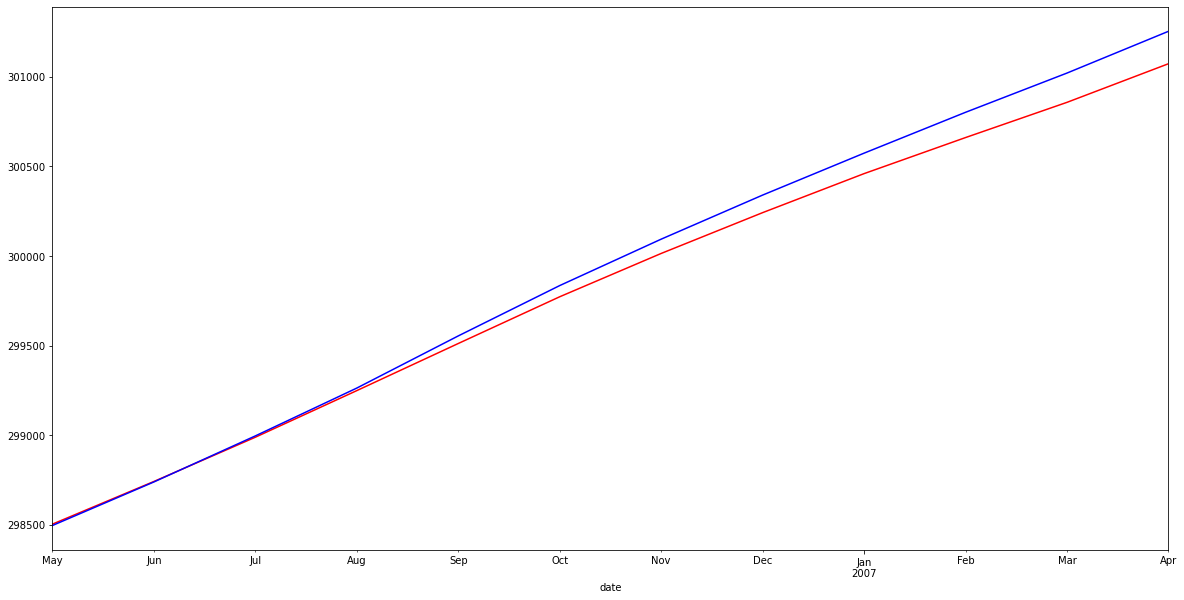

In [57]:
future_forecast.plot(color = 'red')
df_test.value[:12].plot(color = 'blue')

In [58]:
forecast_error = df_test[:12] - future_forecast

In [59]:
forecast_error = [df_test[:12].value[i] - future_forecast[i] for i in range(len(df_test[:12]))]

In [60]:
forecast_err = np.square(forecast_error)

In [61]:
mse = np.mean(forecast_err)
print(mse)

9531.197177265603
